# Homework solutions

Last week you used the following equations to model the dynamics of the [Belousov–Zhabotinsky reaction](https://en.wikipedia.org/wiki/Belousov%E2%80%93Zhabotinsky_reaction) where $X_i$ and $Y_i$ are the concentrations of the two reactants X (red) and Y (colourless) at timestep $i$.

$$\begin{align}
X_{i+1} &= X_i + k_1-k_2X_i + k_3X_i^2Y_i\\
Y_{i+1} &= Y_i + k_4X_i - k_3X_i^2Y_i.
\end{align}$$

For the parameter values $k_1=0.1$, $k_2=0.4$, $k_3=0.1$ and $k_4=0.2$, the system results in decaying oscillations of the variables $X$ and $Y$. Over time the system reaches equilibrium and the values of $X$ and $Y$ reach a steady state. Assuming the system is at equilibrium after $1000$ time steps, we can assume that the steady-state value of $X$ is $X_{1000}$.

1. Run the simulation with the parameters above for $1000$ time steps and plot the two arrays `X` and `Y` on the same figure.
2. Determine the steady-state value of $X$. 
3. Write a function `steady_state_X(k4)` which runs the simulation with $k_1=0.1$, $k_2=0.4$, $k_3=0.1$ and the given value of $k_4$, then returns the steady-state value of $X$.
4. Determine the steady-state value of X for a range of values of $k_4$ between $0$ and $0.3$ and plot the results on a graph with $k_4$ on the x-axis and the steady-state value of $X$ on the y-axis.

## Modelling

First, to run the simulation we can use the same approach as last week.

Text(0, 0.5, 'Concentrations')

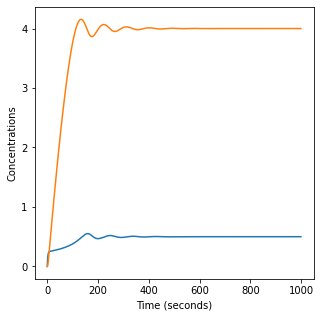

In [15]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# set up variables and arrays
n = 1000
k1 = 0.1
k2 = 0.4
k3 = 0.1
k4 = 0.2

X = np.zeros(n)
Y = np.zeros(n)

# initialise variables (not strictly necessary here!)
X[0] = 0
Y[0] = 0

# implement equations
for i in range(n - 1):
    X[i+1] = X[i] + k1 - k2*X[i] + k3*(X[i]**2)*Y[i]
    Y[i+1] = Y[i] + k4*X[i] - k3*(X[i]**2)*Y[i]

# plot on the same figure
plt.figure(figsize=(5,5))
plt.plot(X)
plt.plot(Y)
plt.xlabel("Time (seconds)")
plt.ylabel("Concentrations")

## Determine the steady state

We are told that the system is in equilibrium after $1000$ steps (and we can see from the figure that oscillations are not visible after about 600 steps), so to determine the steady state value of $X$ we just need to check the value of $X_{1000}$.

In [16]:
print('The steady state value of X is', X[999])

The steady state value of X is 0.49999189523530085


## Turning into a function

As we saw in the tutorial, we just need to wrap our existing code in a few extra lines to turn it into a function that can handle lots of values of $k_4$. 

In [22]:
def steady_state_X(k4):
    # set up variables and arrays
    n = 1000
    k1 = 0.1
    k2 = 0.4
    k3 = 0.1

    X = np.zeros(n)
    Y = np.zeros(n)

    # initialise variables (not strictly necessary here!)
    X[0] = 0
    Y[0] = 0

    # implement equations
    for i in range(n - 1):
        X[i+1] = X[i] + k1 - k2*X[i] + k3*(X[i]**2)*Y[i]
        Y[i+1] = Y[i] + k4*X[i] - k3*(X[i]**2)*Y[i]
        
    #return the steady state
    return(X[999])

To test this we can check it returns the same value as above for $k_4 = 0.2$.

In [26]:
print('When k_4 =', 0.2, 'the steady state value of X is', steady_state_X(0.2))

When k_4 = 0.2 the steady state value of X is 0.49999189523530085


As we expected!

## Explore behaviour for changing $k_4$

We would like to explore how the steady state value of $X$ changes for values of $k_4$ between $0$ and $0.3$. We did something similar in the tutorial, so we can modify our existing code:


Text(0, 0.5, 'Steady state value')

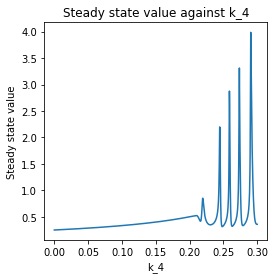

In [30]:
# set up variables and arrays
k4_array = np.linspace(0, 0.3, 1000)
steady_state = np.zeros(1000) # be careful not to give this the same name as the function!

for i in range(1000):
    # Calculate the steady state value of X
    # for the given value of k_4
    steady_state[i] = steady_state_X(k4_array[i])

# Create a plot of steady state values against k_4 values
plt.figure(figsize=(4,4))
plt.plot(k4_array, steady_state)
plt.title('Steady state value against k_4')
plt.xlabel('k_4')
plt.ylabel('Steady state value')

We can see that as $k_4$ increases from $0$ to $0.2$, the steady state value also gradually increases. When $k_4$ is larger than $0.2$ the steady state value oscillates rapidly.